# 04. The Scale-Free Property

## Contents

* [04.01. Introduction](#0401-introduction)
* [04.02. Power Laws and Scale-Free Networks](#0402-power-laws-and-scale-free-networks)

In [21]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import networkx as nx

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
"""{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
networkx\t{}"""
    .format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, nx.__version__))

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

2019-5-6 14:27:17
----------------------
numpy		1.15.2
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
networkx	2.2


## 04.01. Introduction

## 04.02. Power Laws and Scale-Free Networks

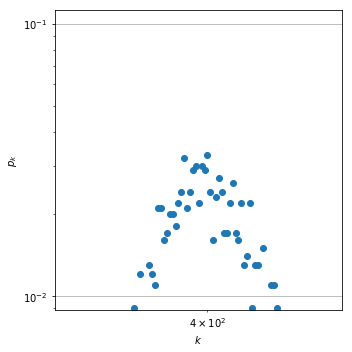

In [2]:
N = 1000
p = .4

G = nx.gnp_random_graph(N, p, seed=123)
p_k_arr = nx.degree_histogram(G)
p_ks = [p/N for p in p_k_arr]
ks = range(len(p_k_arr))

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(ks, p_ks)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k$')
ax.grid(True)
ax.set_xlim(350, 450)
# ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

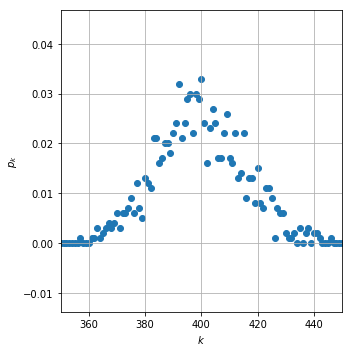

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(ks, p_ks)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k$')
ax.grid(True)
ax.set_xlim(350, 450)
# ax.set_ylim(0, .020)

plt.tight_layout()
plt.show()

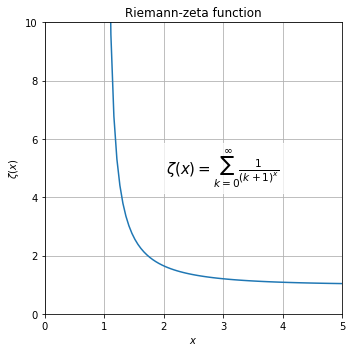

In [4]:
from scipy.special import zeta

xmax = 5
ymax = 10

x = np.linspace(0, xmax, 100)
zetas = zeta(x)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, zetas)

ax.set_title('Riemann-zeta function')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\zeta(x)$')
ax.text(xmax/2+1/2, ymax/2, 
        r'$\zeta(x) = \sum_{k=0}^\infty{\frac{1}{(k+1)^x}}$', 
        fontsize=15, ha='center', va='center', 
        bbox=dict(fc='white', ec='white', alpha=0.75))
# ax.legend(loc='best')
ax.set_xlim(0, xmax)
ax.set_ylim(0, ymax)
ax.grid(True)

plt.tight_layout()
plt.savefig('fig/fig_Riemann-zeta.png')
plt.show()

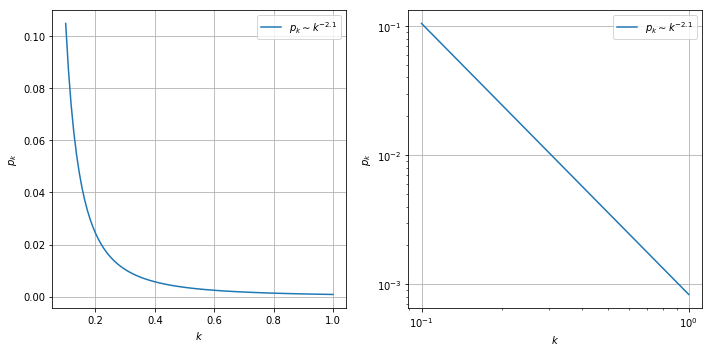

In [5]:
gamma = -2.1
def scale_free_pk(k, gamma):
    return k**(gamma) /1200

ks = np.linspace(0.1, 1, 100)
ps = scale_free_pk(ks, gamma)

fig, ax = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
ax[0].plot(ks, ps, label=r'$p_k \sim k^{-2.1}$')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$p_k$')
ax[0].grid(True)
ax[0].legend(loc='best')

ax[1].plot(ks, ps, label=r'$p_k \sim k^{-2.1}$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$p_k$')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].grid(True)
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


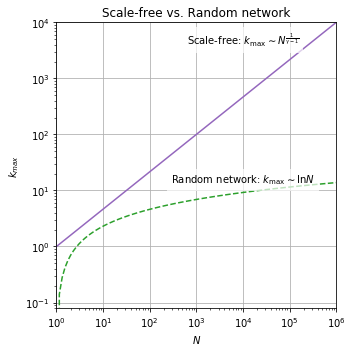

In [35]:
def random_network(N):
    return np.log(N)

def scale_free(N, gamma):
    return N**(1/(gamma - 1))

N = 10 ** np.linspace(0, 6, 100)
gamma = 2.5

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(N, random_network(N), label=('Random network'), c=color[2], linestyle='--')
ax.plot(N, scale_free(N, gamma), label=('Scale-free'), c=color[4])

ax.text(10**4, random_network(10**5.1), ('Random network: ' r'$k_{\max} \sim \ln{N}$'), ha='center', va='bottom', bbox=dict(fc='white', ec='none', alpha=.7))
ax.text(10**4, scale_free(10**5.3, gamma), ('Scale-free: ' r'$k_{\max} \sim N^{\frac{1}{\gamma - 1}}$'), ha='center', va='bottom', bbox=dict(fc='white', ec='none', alpha=.7))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$k_{max}$')
ax.set_xlim(1, 10**6)
ax.set_ylim(0, 10**4)
ax.grid(True)
ax.set_title('Scale-free vs. Random network')
# ax.legend('best')

plt.tight_layout()
plt.savefig('fig/fig0405.png')
plt.show()